<a href="https://colab.research.google.com/github/Swathikammila/capstone-project/blob/main/swathi_hotel_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io

In [ ]:
#Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


In [ ]:
#Model evaluation tools
from sklearn.metrics import classification_report,accuracy_score, f1_score,confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score

#Data processing functions
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

## **Importing Data Set**

In [ ]:
url="https://raw.githubusercontent.com/Premalatha-success/Datasets/main/hotel_bookings.csv"
p=requests.get(url).content
df=pd.read_csv(io.StringIO(p.decode('utf-8')))
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,07-03-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,09-06-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,09-07-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,09-07-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,09-07-2017


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

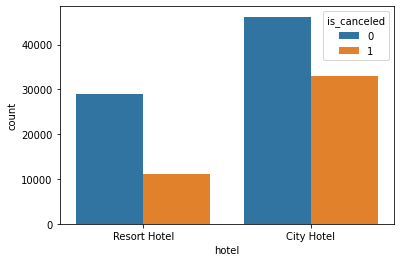

In [ ]:
sns.countplot(x="hotel",hue="is_canceled",data=df)

In [ ]:
correlation_mat = df.corr()

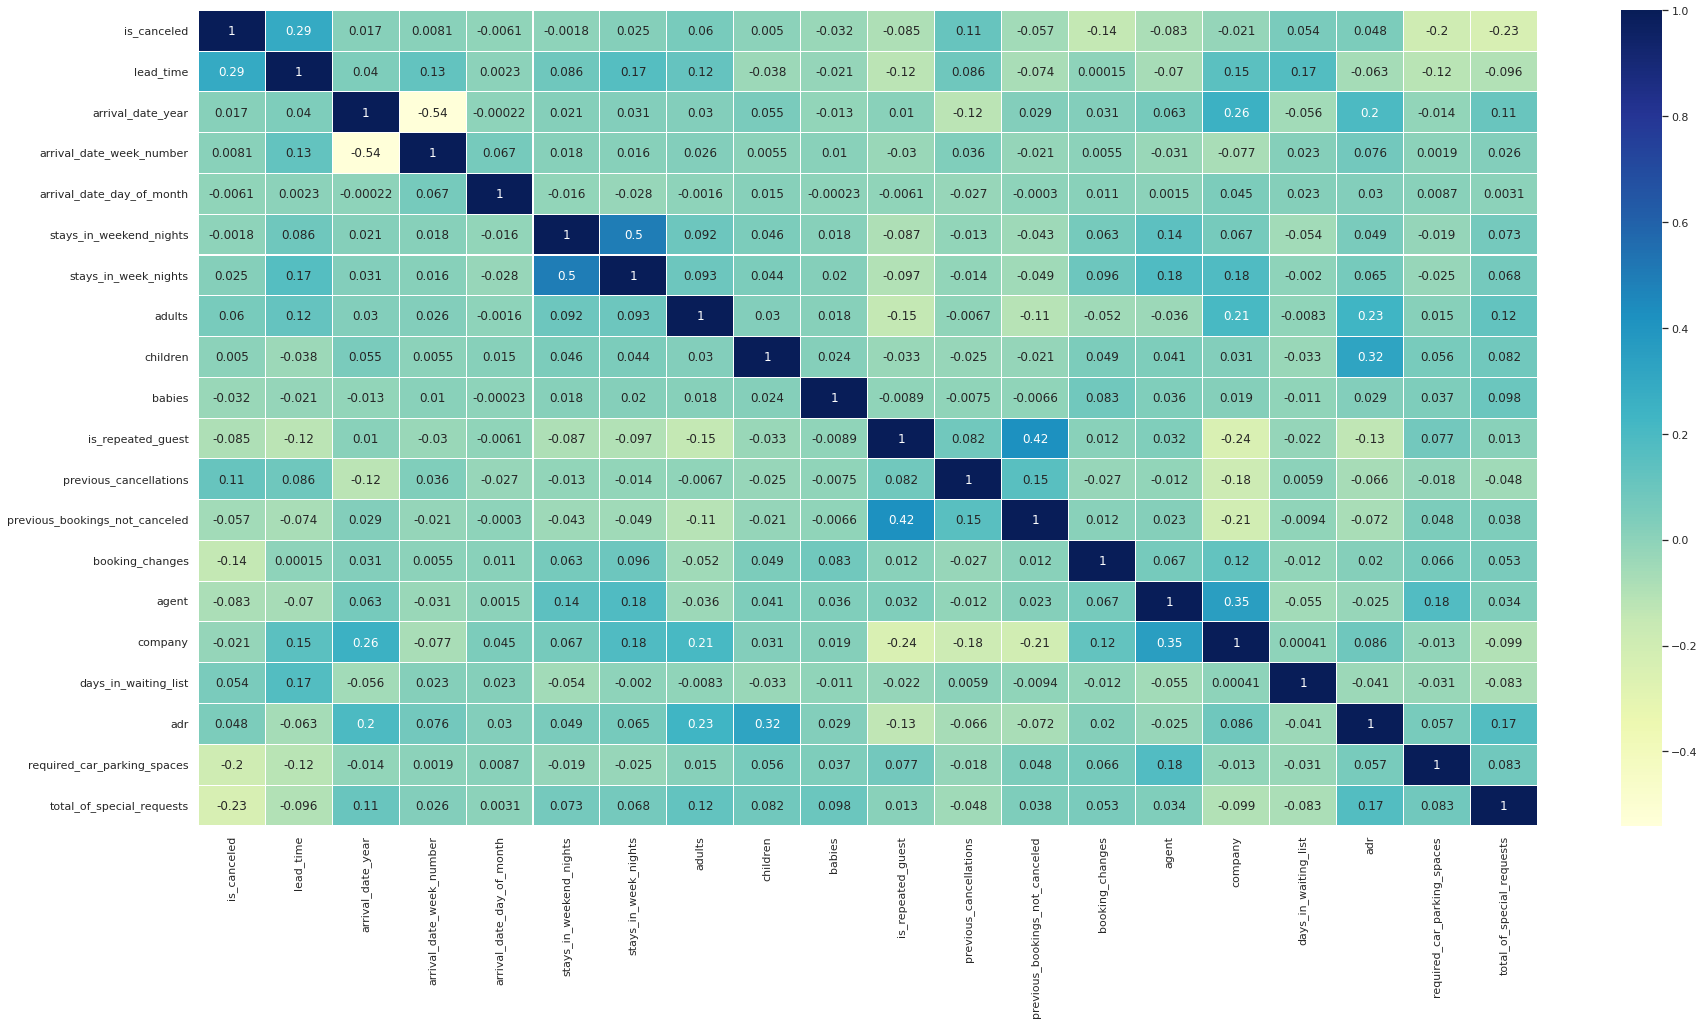

In [ ]:
sns.set(rc = {'figure.figsize':(30,15)})
sns.heatmap(correlation_mat,annot=True,linewidths=.05,cmap="YlGnBu")

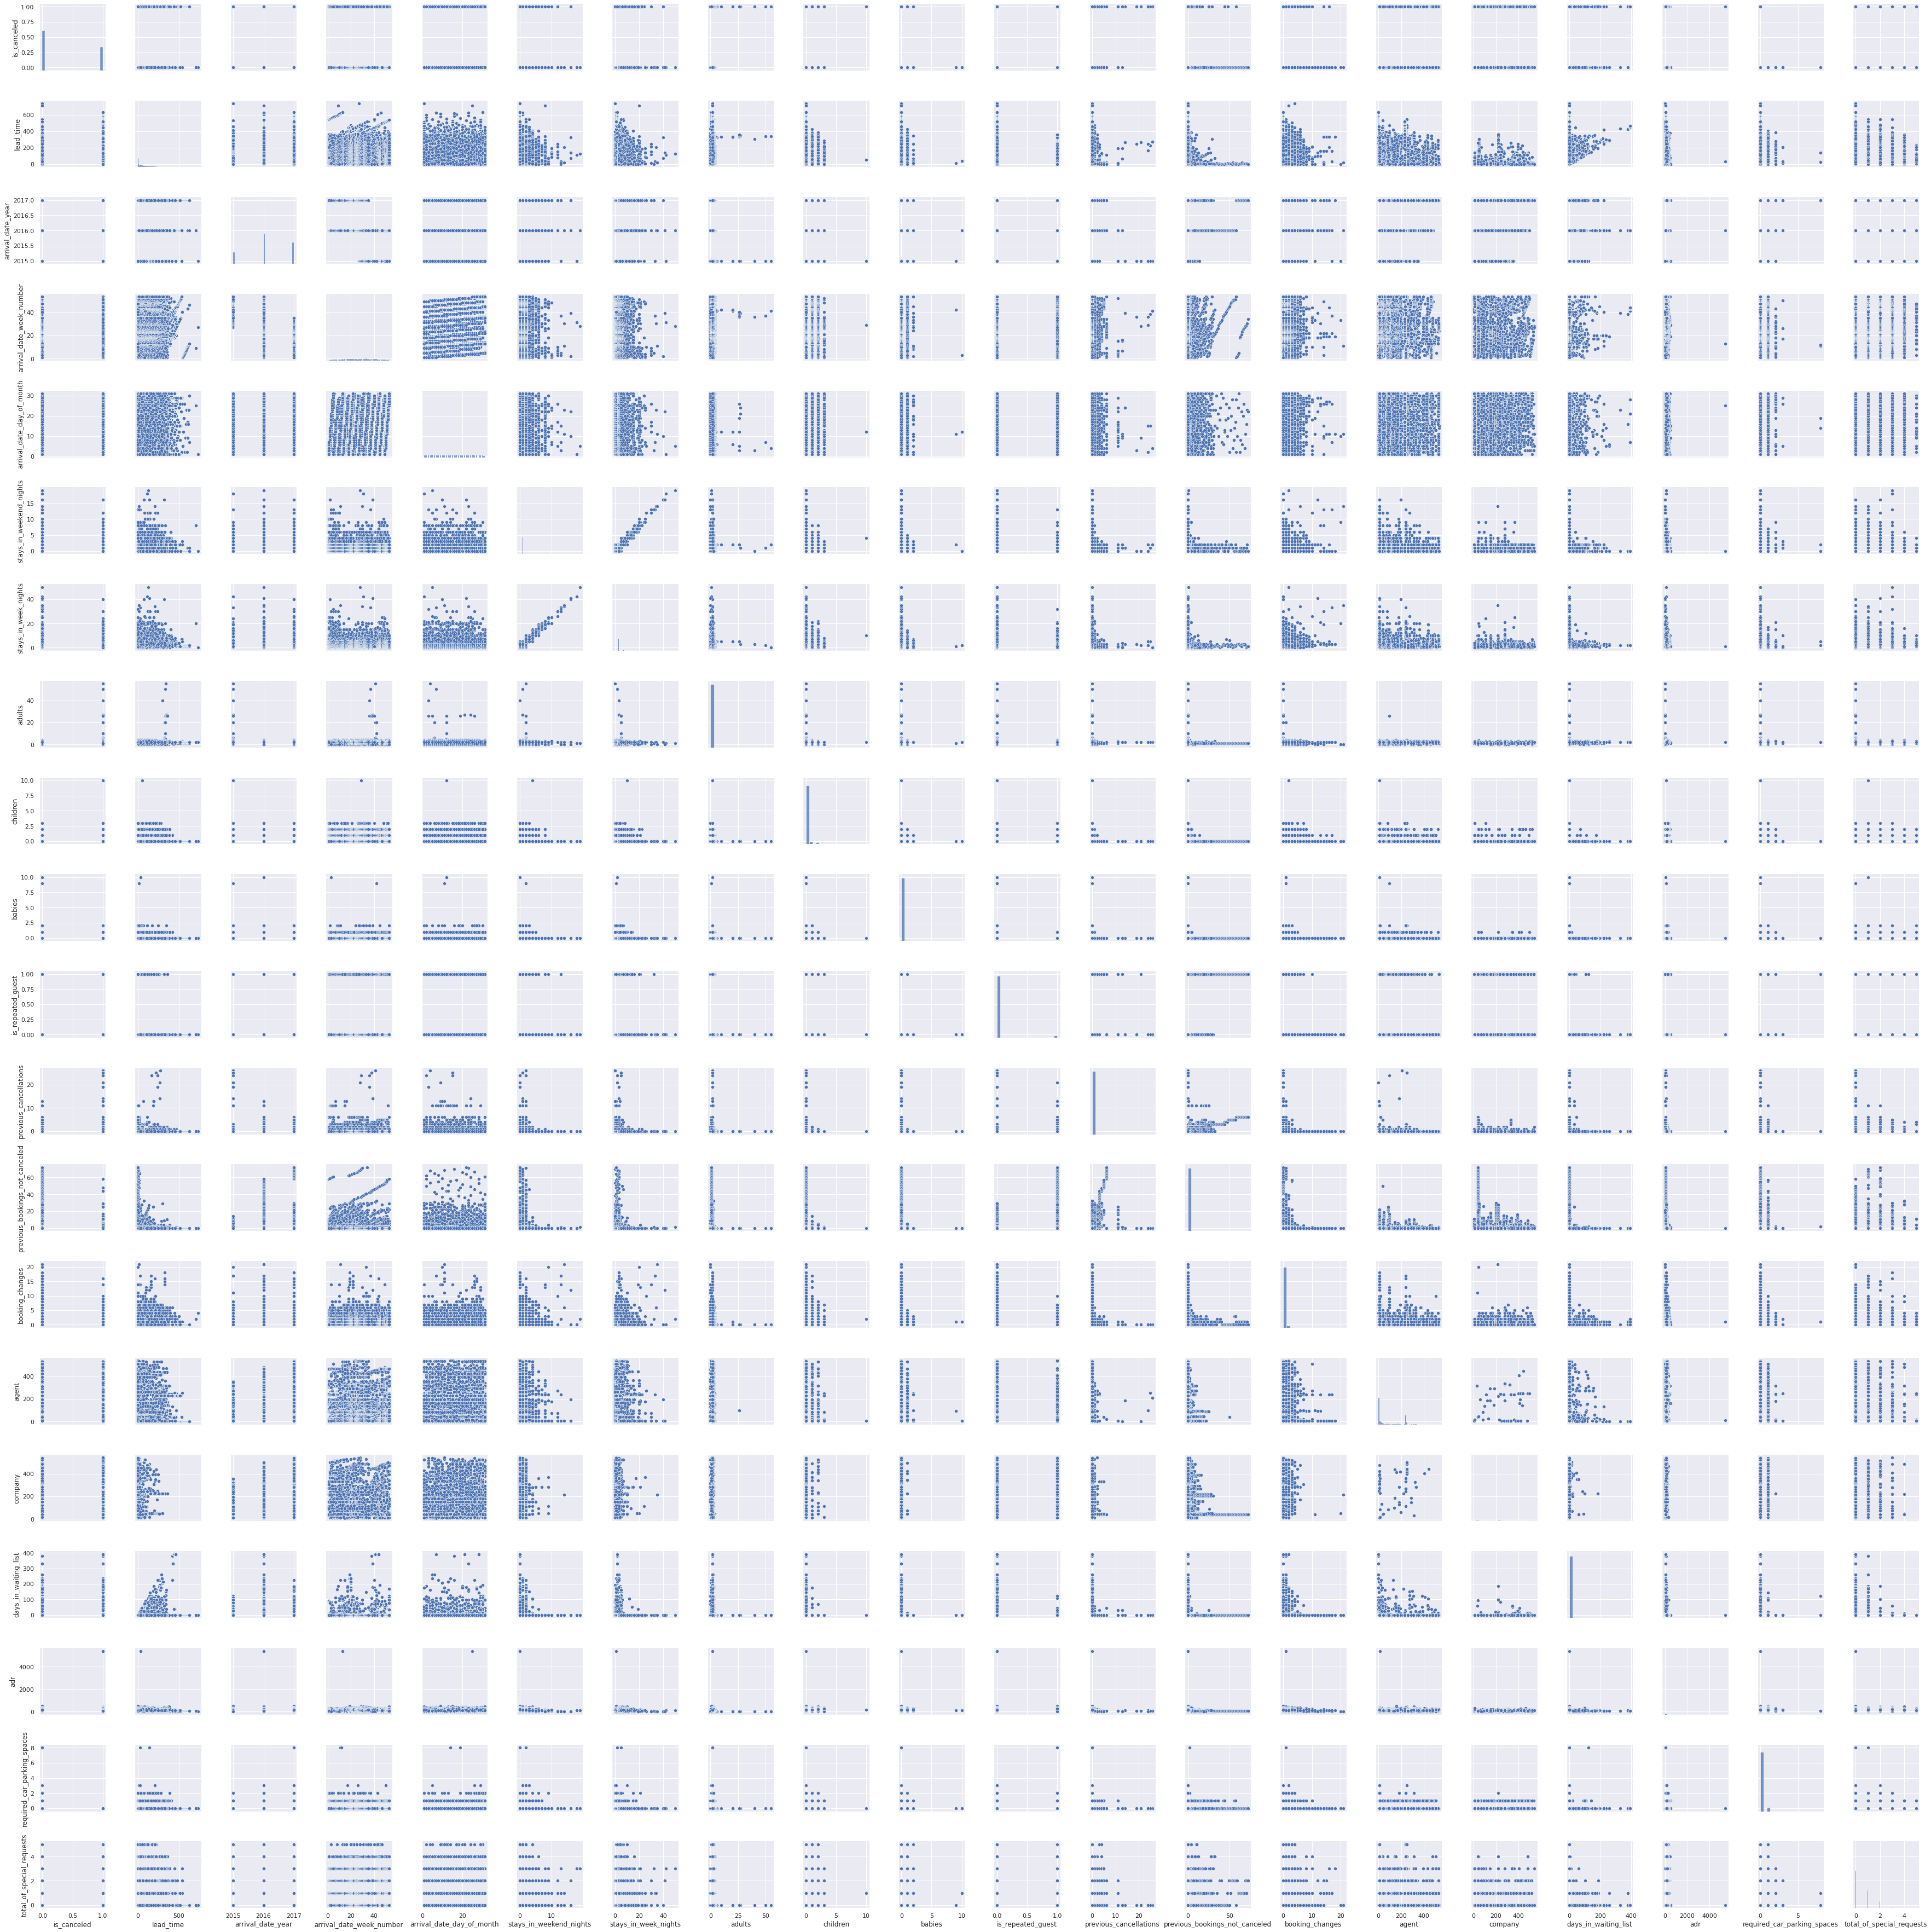

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## **Checking null Values**

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

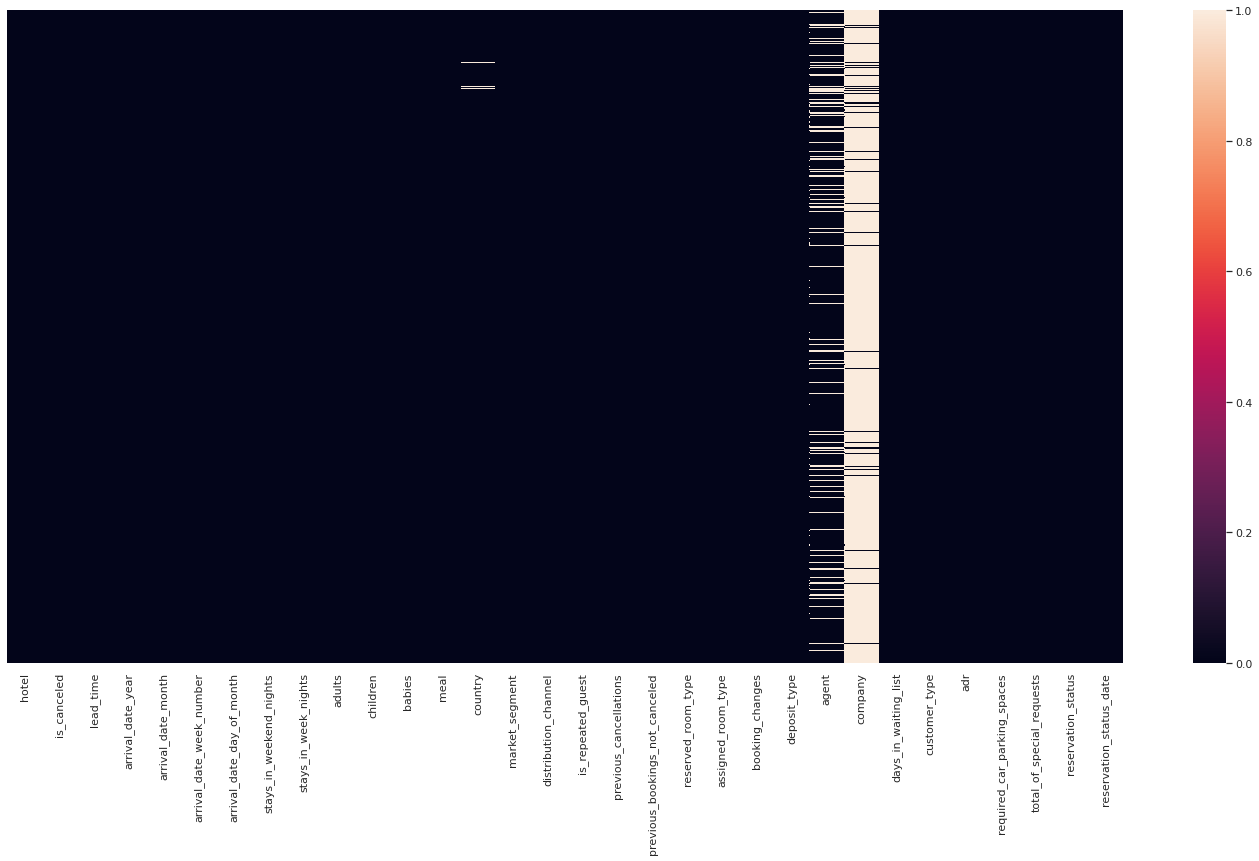

In [ ]:
plt.figure(figsize=(25,12))
sns.heatmap(df.isnull(),yticklabels=False)

## **Replacing Numerical Missing Values with median/mean**

In [ ]:
med1=df['children'].median()
med2=df['agent'].median()
med3=df['company'].median()
df['children'] = df['children'].replace(np.nan,med1)
df['agent'] = df['agent'].replace(np.nan,med2)
df['company'] = df['company'].replace(np.nan,med3)

## **Replacing Categorical missing values with Mode**

In [ ]:
v= df['country'].mode().values[0]
df['country'] = df['country'].replace(np.nan,v)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

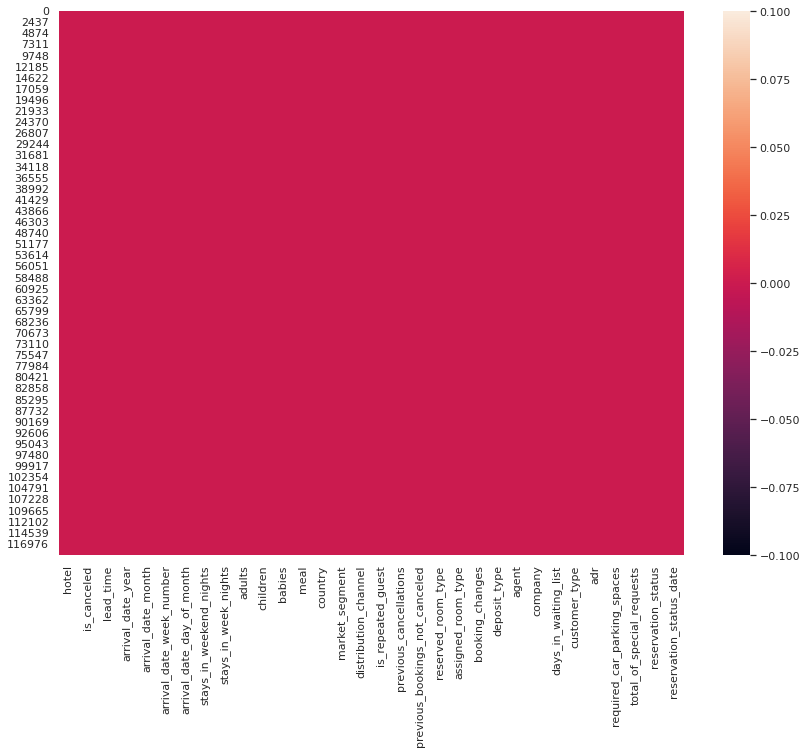

In [ ]:
#Heat map for null values
plt.figure(figsize=(14,10))
sns.heatmap(df.isnull())

In [ ]:
df.shape

(119390, 32)

## **Dropping Duplicate Values**

In [ ]:
df = df.drop_duplicates()
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,14.0,179.0,0,Transient,0.00,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,14.0,179.0,0,Transient,0.00,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,14.0,179.0,0,Transient,75.00,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,179.0,0,Transient,75.00,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,179.0,0,Transient,98.00,0,1,Check-Out,07-03-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,179.0,0,Transient,96.14,0,0,Check-Out,09-06-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,179.0,0,Transient,225.43,0,2,Check-Out,09-07-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,179.0,0,Transient,157.71,0,4,Check-Out,09-07-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,179.0,0,Transient,104.40,0,0,Check-Out,09-07-2017


## **Encoding the Categorical Data**

In [ ]:
#Encoding categorical data
s = LabelEncoder()
df['hotel'] = s.fit_transform(df['hotel'])
df['arrival_date_month'] = s.fit_transform(df['arrival_date_month'])
df['meal'] = s.fit_transform(df['meal'])
df['country'] = s.fit_transform(df['country'])
df['market_segment'] = s.fit_transform(df['market_segment'])
df['distribution_channel'] = s.fit_transform(df['distribution_channel'])
df['reserved_room_type'] = s.fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = s.fit_transform(df['assigned_room_type'])
df['deposit_type'] = s.fit_transform(df['deposit_type'])
df['customer_type'] = s.fit_transform(df['customer_type'])
df['reservation_status'] = s.fit_transform(df['reservation_status'])
df['reservation_status_date'] = s.fit_transform(df['reservation_status_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87377 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87377 non-null  int64  
 1   is_canceled                     87377 non-null  int64  
 2   lead_time                       87377 non-null  int64  
 3   arrival_date_year               87377 non-null  int64  
 4   arrival_date_month              87377 non-null  int64  
 5   arrival_date_week_number        87377 non-null  int64  
 6   arrival_date_day_of_month       87377 non-null  int64  
 7   stays_in_weekend_nights         87377 non-null  int64  
 8   stays_in_week_nights            87377 non-null  int64  
 9   adults                          87377 non-null  int64  
 10  children                        87377 non-null  float64
 11  babies                          87377 non-null  int64  
 12  meal                           

In [ ]:
df['y'] = df['is_canceled']
df = df.drop(['is_canceled'],axis=1)

## **Splitting the DataSet into Training set and Testing set**

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Training the model with Training set**

In [ ]:
classifiers = [
    LogisticRegression(solver="liblinear"),
    GaussianNB(),
    KNeighborsClassifier(4),
    #SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=0),
    RandomForestClassifier(),
    BaggingClassifier(n_estimators=150,random_state=0),
    AdaBoostClassifier(n_estimators=120,random_state=0),
    GradientBoostingClassifier(),
    ]

## **Predicting the Test set results**

LogisticRegression
Confusion Matrix: 
[[15819     0]
 [  244  5782]]
Training Accuracy :  0.9882194958188366
Testing Accuracy :  0.9888303959716183
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15819
           1       1.00      0.96      0.98      6026

    accuracy                           0.99     21845
   macro avg       0.99      0.98      0.99     21845
weighted avg       0.99      0.99      0.99     21845

LogisticRegression ---> 0.9888303959716183 

GaussianNB
Confusion Matrix: 
[[14699  1120]
 [    0  6026]]
Training Accuracy :  0.9468656534212293
Testing Accuracy :  0.9487296864271
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     15819
           1       0.84      1.00      0.91      6026

    accuracy                           0.95     21845
   macro avg       0.92      0.96      0.94     21845
weighted avg       0.96      0.95      0.95     21845

GaussianNB ---> 

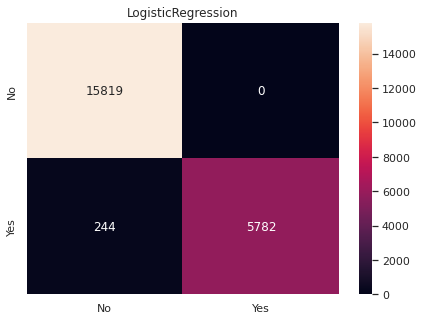

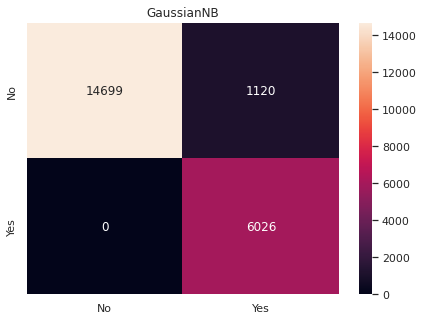

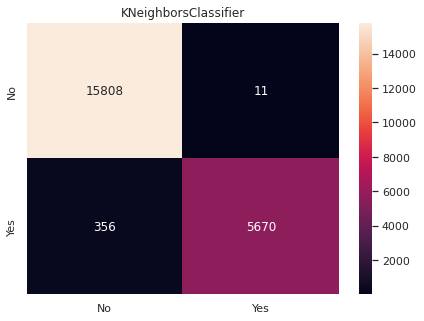

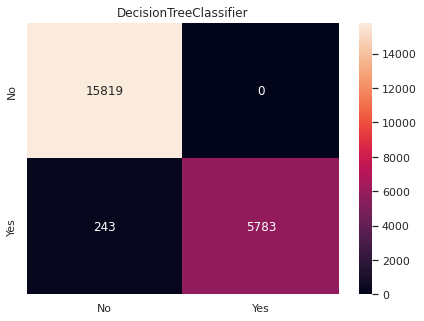

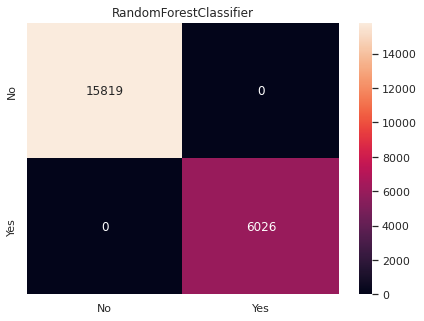

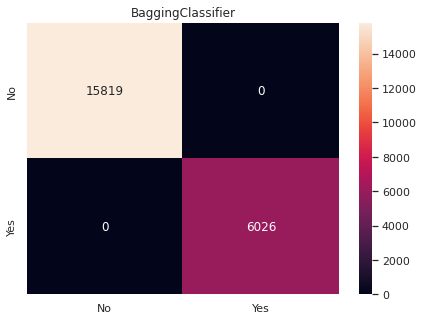

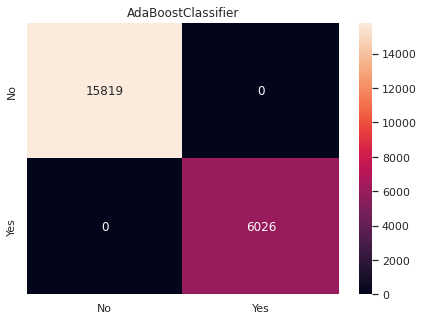

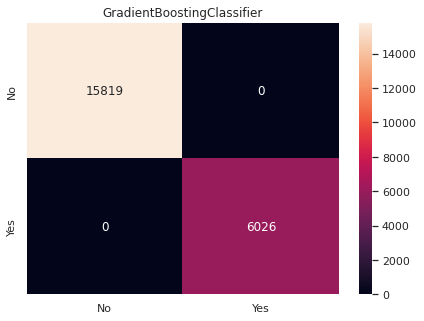

In [ ]:
from sklearn import metrics
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print('\033[1m' + name + '\033[0m')
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print('Confusion Matrix: ')
    print(cm)
    print('Training Accuracy : ',clf.score(X_train,y_train))
    print('Testing Accuracy : ',clf.score(X_test, y_test))
    print(classification_report(y_test, y_predict))
    print(name,"--->",accuracy_score(y_test, y_predict),"\n") 
    cm1=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
    dp_cm = pd.DataFrame(cm1, index = [i for i in ["No","Yes"]],columns = [i for i in ["No","Yes"]])
    plt.figure(figsize = (7,5))
    plt.title(name)
    sns.heatmap(dp_cm, annot=True ,fmt='g')
